<a href="https://colab.research.google.com/github/PUNEET29GARG/E-Commerce-Data-Analysis/blob/main/E_Commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1. Loading the Dataset:**
Loading the dataset "ecommerce_data.csv" using Pandas and displaying the first few rows to get an initial understanding of the data.

In [ ]:
#reading data set
df=pd.read_csv("/content/ecommerce.csv")
#first five rows
df.head()

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan
2,3.0,31.0,Product E,Automobile,5891.07,99.0,3/29/2022,Brazil
3,4.0,40.0,Product H,Clothing,2765.73,83.0,11/7/2022,China
4,5.0,17.0,Product B,Automobile,4594.39,17.0,12/29/2021,Colombia


In [ ]:
#checking info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order_ID     882 non-null    float64
 1   Customer_ID  947 non-null    float64
 2   Product      1000 non-null   object 
 3   Category     1000 non-null   object 
 4   Price        875 non-null    float64
 5   Quantity     962 non-null    float64
 6   Order_Date   1000 non-null   object 
 7   Country      910 non-null    object 
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


**2. Data Cleaning:**
Check for missing values, duplicated rows, and inconsistent data. Handle any issues found in this step.

In [ ]:
#Checking for null values
df.isna().sum()

Order_ID       118
Customer_ID     53
Product          0
Category         0
Price          125
Quantity        38
Order_Date       0
Country         90
dtype: int64

In [ ]:
#taking a look at missing data
df[df.isnull().any(axis=1)]


,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan
8,9.0,31.0,Product H,Accessories,NaN,81.0,12/2/2022,Russia
12,13.0,7.0,Product C,Electronics,NaN,64.0,5/29/2020,Indonesia
20,21.0,20.0,Product H,Automobile,NaN,17.0,3/4/2022,Philippines
...,...,...,...,...,...,...,...,...
992,993.0,39.0,Product F,Clothing,6067.33,50.0,5/16/2022,NaN
996,NaN,9.0,Product B,Electronics,2240.62,67.0,3/19/2020,Colombia
997,998.0,48.0,Product G,Accessories,4649.53,1.0,9/18/2022,NaN
998,NaN,50.0,Product B,Kitchen,9547.98,56.0,12/5/2020,Pakistan


checking for corelation among columns in order to take care of missing data if possible

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order_ID,Customer_ID,Price,Quantity
Order_ID,1.000000,-0.053905,0.006278,0.016954
Customer_ID,-0.053905,1.000000,-0.043363,-0.078597
Price,0.006278,-0.043363,1.000000,0.003740
Quantity,0.016954,-0.078597,0.003740,1.000000


#OBSERVATIONS:


*   THERE IS ALMOST NO RELATION BETWEEN PRICE AND QUANTITY ,WHICH MEANS CHANGING PRICE WON'T AFFECT QUANTITY PURCHASED




**#Checking for duplicated rows**

In [ ]:
df.duplicated().any()

False

In [ ]:
#there are no duplicate row let's verify some more
df["Order_ID"].nunique() #checking unique values for Order_ID---> all are unique and rest are missing so no duplicates

882

In [ ]:
#df["Order_ID"].unique()  #no invalid entries are there

**3. Data Summary:**
Let's calculate and display the following summary statistics:
- Total number of orders.
- Total number of customers.
- Total revenue generated.
- Average order value.

**STATISTICAL DATA**

In [ ]:
df.describe()

,Order_ID,Customer_ID,Price,Quantity
count,882.000000,947.000000,875.000000,962.000000
mean,503.809524,26.080253,5074.516811,50.460499
std,286.757156,14.319958,2939.029240,28.606866
min,1.000000,1.000000,4.660000,0.000000
25%,255.250000,14.000000,2379.135000,26.000000
50%,507.500000,26.000000,5286.660000,50.000000
75%,745.750000,39.000000,7534.630000,75.000000
max,1000.000000,50.000000,9990.330000,100.000000


**#OBSERVATION:** From above table it is we have following details:


*   **Total number of orders**  :  882.000000 as we have this much order id and every order has a unique id
*   **Total number of customers **  :  50 as we have this much unique customer Id and every customer has one uinque Id.








In [ ]:
df["Customer_ID"].nunique()

50

Average order value.

In [ ]:
#Average order value =  avg price*avg quantity
Average_order_value=(df["Price"].mean())*(df["Quantity"].mean())
Average_order_value

256062.65028812594

Total revenue generated.

In [ ]:
#Total_revenue_generated= Total sum of price*Total sum of quantity
Total_revenue_generated=(df["Price"].sum())*(df["Quantity"].sum())
Total_revenue_generated

215540735880.03

**4. Category Analysis:**
Let's explore the distribution of products across different categories. Providing percentage sales of
each category

In [ ]:
df.head()

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan
2,3.0,31.0,Product E,Automobile,5891.07,99.0,3/29/2022,Brazil
3,4.0,40.0,Product H,Clothing,2765.73,83.0,11/7/2022,China
4,5.0,17.0,Product B,Automobile,4594.39,17.0,12/29/2021,Colombia


distribution of products across different categories.

In [ ]:
a=pd.DataFrame(df.groupby("Product")["Category"].value_counts())
a


Category
Product   Category             
Product A Electronics        28
          Clothing           27
          Kitchen            25
          Automobile         20
          Accessories        12
Product B Kitchen            38
          Automobile         31
          Clothing           31
          Electronics        30
          Accessories        24
Product C Electronics        28
          Accessories        24
          Automobile         24
          Kitchen            22
          Clothing           12
Product D Clothing           33
          Accessories        29
          Kitchen            27
          Electronics        25
          Automobile         23
Product E Kitchen            32
          Accessories        31
          Clothing           28
          Electronics        22
          Automobile         19
Product F Clothing           26
          Accessories        20
          Automobile         20
          Electronics        18
          Kitchen            18
Product G Clothing           32
          Accessories        29
          Kitchen            29
          Automobile         28
          Electronics        24
Product H Clothing           29
          Automobile         24
          Electronics        24
          Accessories        19
          Kitchen            15

The unstack() method to convert the multi-index DataFrame into a regular DataFrame

In [ ]:
# Unstack multi-index DataFrame
#level=0. This means that the first level of the index will be unstacked and pivoted to become the inner-most level of column labels.
df_unstacked = a.unstack(level=0)
df_unstacked

Category                                                    \
Product     Product A Product B Product C Product D Product E Product F   
Category                                                                  
Accessories        12        24        24        29        31        20   
Automobile         20        31        24        23        19        20   
Clothing           27        31        12        33        28        26   
Electronics        28        30        28        25        22        18   
Kitchen            25        38        22        27        32        18   

                                 
Product     Product G Product H  
Category                         
Accessories        29        19  
Automobile         28        24  
Clothing           32        29  
Electronics        24        24  
Kitchen            29        15

graph showing distribution of products across different categories

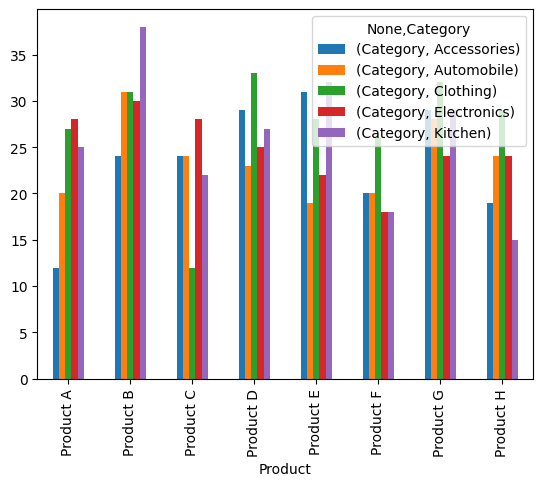

In [ ]:
# Create bar plot
df_unstacked.plot(kind='bar')
plt.show()

Provide percentage sales of each category

<Figure size 600x600 with 0 Axes>

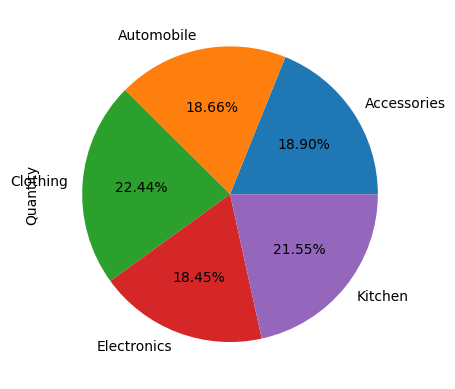

<Figure size 600x600 with 0 Axes>

In [ ]:
#graph showing % sales of each category
df.groupby("Category")["Quantity"].sum().plot(kind="pie",autopct="%.2f%%")
plt.figure(figsize=(6,6))

In [ ]:
df.head(2)

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country
0,1.0,47.0,Product D,Kitchen,NaN,64.0,7/1/2021,China
1,NaN,NaN,Product A,Clothing,4477.63,93.0,3/21/2021,Pakistan


**5. Country-wise Analysis:**
Identify the top 5 countries with the highest number of orders. Create a bar plot to visualize this
information.

In [ ]:
#top 5 countries with the highest number of orders
df["Country"].value_counts().nlargest(5)

China          186
Indonesia       95
Russia          55
Philippines     41
Brazil          29
Name: Country, dtype: int64

<Axes: >

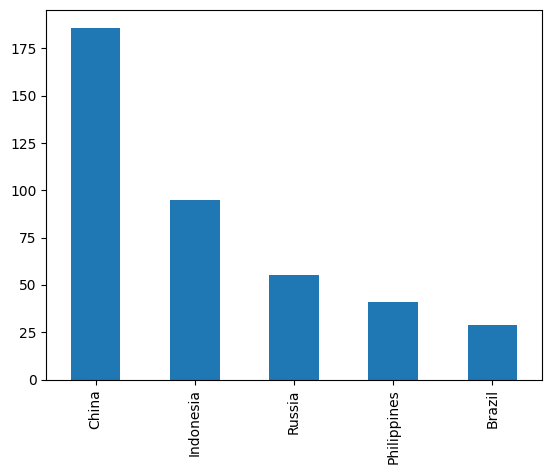

In [ ]:
df["Country"].value_counts().nlargest(5).plot(kind="bar")

**6. Monthly Analysis:**
Show the monthly revenue over the entire dataset's time period.

In [ ]:
#converting Order_Date' object type into date type dtype
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
#checking dtype now
df['Order_Date'].dtype

dtype('<M8[ns]')

In [ ]:
#creating new col named Month and extracting month from order date column
df["Month"]=df['Order_Date'].dt.month
df.head(2)

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country,Month
0,1.0,47.0,Product D,Kitchen,NaN,64.0,2021-07-01,China,7
1,NaN,NaN,Product A,Clothing,4477.63,93.0,2021-03-21,Pakistan,3


In [ ]:
##creating new col named Year and extracting Year from order date column
#because we need  monthly revenue over the entire dataset's time period.
df["Year"]=df['Order_Date'].dt.year
df.head(2)

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country,Month,Year
0,1.0,47.0,Product D,Kitchen,NaN,64.0,2021-07-01,China,7,2021
1,NaN,NaN,Product A,Clothing,4477.63,93.0,2021-03-21,Pakistan,3,2021


In [ ]:
df["Year"].unique()

array([2021, 2022, 2020])

In [ ]:
#creating a new column because we need  monthly revenue for that we need order"s value
df["OrderValue"]=df["Price"]*df["Quantity"]
df.head(2)

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country,Month,Year,OrderValue
0,1.0,47.0,Product D,Kitchen,NaN,64.0,2021-07-01,China,7,2021,NaN
1,NaN,NaN,Product A,Clothing,4477.63,93.0,2021-03-21,Pakistan,3,2021,416419.59


Statistical data showing monthly revenue over the data set's time period

In [ ]:
#using groupby technique in order to club year month and ordervalue to get monthly revenue
b=df.groupby(["Year","Month"]).agg({"OrderValue":sum})
b

OrderValue
Year Month            
2020 1      5312518.52
     2      3827241.42
     3      9985796.99
     4      6508435.38
     5      2712359.15
     6      6031026.00
     7      4652896.22
     8      6736869.97
     9      4731545.07
     10     6699313.81
     11     5498829.87
     12     6852673.58
2021 1      7626588.37
     2      5060944.90
     3      5349195.17
     4      2677804.39
     5      8635003.70
     6      5612518.18
     7      5578884.56
     8      5091914.73
     9      3295489.94
     10     2763198.98
     11     3945216.41
     12     6309498.76
2022 1      6090001.96
     2      5052589.93
     3      7202937.88
     4      3505920.90
     5      7317431.69
     6      8343505.17
     7      7214889.30
     8      5327246.16
     9      8489678.67
     10     6778717.09
     11     9798241.58
     12     5562378.50

In [ ]:
# Unstack multi-index DataFrame
#level=0. This means that the first level of the index will be unstacked and pivoted to become the inner-most level of column labels.
df_unstacked = b.unstack(level=0)
df_unstacked

OrderValue                        
Year         2020        2021        2022
Month                                    
1      5312518.52  7626588.37  6090001.96
2      3827241.42  5060944.90  5052589.93
3      9985796.99  5349195.17  7202937.88
4      6508435.38  2677804.39  3505920.90
5      2712359.15  8635003.70  7317431.69
6      6031026.00  5612518.18  8343505.17
7      4652896.22  5578884.56  7214889.30
8      6736869.97  5091914.73  5327246.16
9      4731545.07  3295489.94  8489678.67
10     6699313.81  2763198.98  6778717.09
11     5498829.87  3945216.41  9798241.58
12     6852673.58  6309498.76  5562378.50

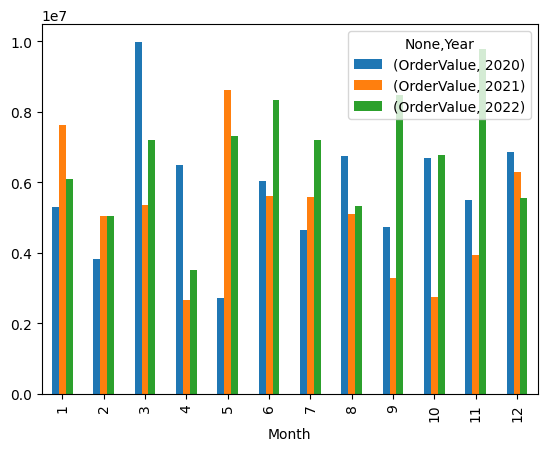

In [ ]:
# Create bar plot
df_unstacked.plot(kind='bar')
plt.show()

**7. Customer Insights:**

Identify the top 5 customers who have spent the most. Display their ID and total spending.

In [ ]:
df.head(2)

,Order_ID,Customer_ID,Product,Category,Price,Quantity,Order_Date,Country,Month,Year,OrderValue
0,1.0,47.0,Product D,Kitchen,NaN,64.0,2021-07-01,China,7,2021,NaN
1,NaN,NaN,Product A,Clothing,4477.63,93.0,2021-03-21,Pakistan,3,2021,416419.59


** top 5 customers who have spent the most. And we have customer Id.**

In [ ]:
df.groupby("Customer_ID")["OrderValue"].sum().nlargest(5)

Customer_ID
30.0    6710699.79
8.0     6457336.58
28.0    6021059.39
45.0    5990539.54
15.0    5856477.32
Name: OrderValue, dtype: float64

Text(0.5, 1.0, 'showing % spending among top 5 customers')

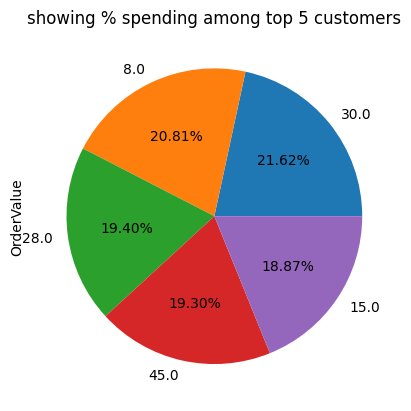

In [ ]:
#plotting graph
df.groupby("Customer_ID")["OrderValue"].sum().nlargest(5).plot(kind="pie",autopct="%.2f%%")
plt.title("showing % spending among top 5 customers")

**8. Price Distribution:**
Show the distribution of product prices between different ranges.

<Axes: ylabel='Frequency'>

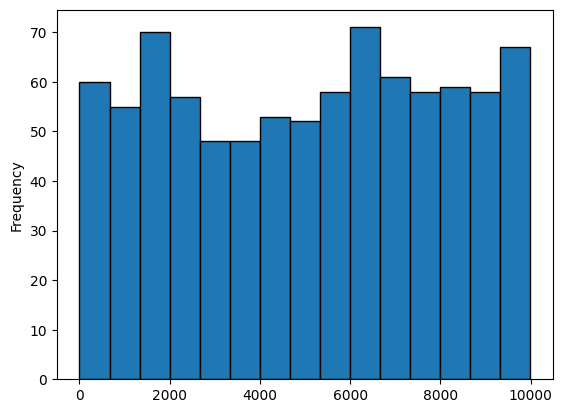

In [ ]:
#showing visual distribution of product prices between different ranges.
df["Price"].plot(kind="hist", bins=15, ec="black")

**10. Time-based Analysis:**
Explore how sales have evolved over time. Average sales yearly, and quaterly

In [ ]:
df_unstacked

OrderValue                        
Year         2020        2021        2022
Month                                    
1      5312518.52  7626588.37  6090001.96
2      3827241.42  5060944.90  5052589.93
3      9985796.99  5349195.17  7202937.88
4      6508435.38  2677804.39  3505920.90
5      2712359.15  8635003.70  7317431.69
6      6031026.00  5612518.18  8343505.17
7      4652896.22  5578884.56  7214889.30
8      6736869.97  5091914.73  5327246.16
9      4731545.07  3295489.94  8489678.67
10     6699313.81  2763198.98  6778717.09
11     5498829.87  3945216.41  9798241.58
12     6852673.58  6309498.76  5562378.50

Average sales yearly,

In [ ]:
# avg sales yearwise
df_unstacked.describe()[1:2]

OrderValue                            
Year         2020          2021          2022
mean  5795792.165  5.162188e+06  6.723628e+06

<Axes: >

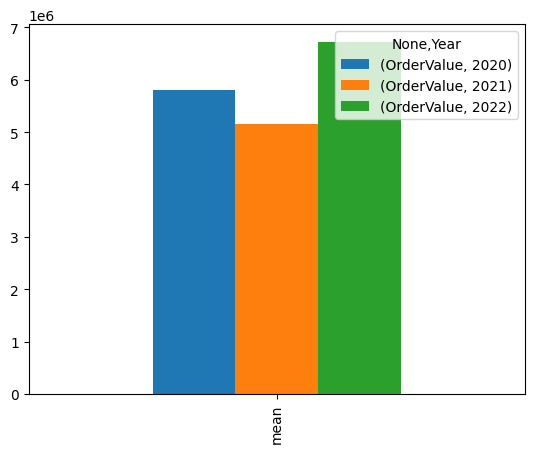

In [ ]:
#bar graph showing year wise avg. sales
df_unstacked.describe()[1:2].plot(kind="bar")

Average sales quaterly

For the year 2020

In [ ]:
# First quarter order value for year 2020
df_unstacked.iloc[:3,:1]

,OrderValue
Year,2020
Month,
1,5312518.52
2,3827241.42
3,9985796.99


In [ ]:
# First quarter  avg. order value for year 2020
a=df_unstacked.iloc[:3,:1].mean()
a

            Year
OrderValue  2020    6.375186e+06
dtype: float64

In [ ]:
## Second  quarter  avg. order value for year 2020
b=df_unstacked.iloc[3:6,:1].mean()
b

            Year
OrderValue  2020    5.083940e+06
dtype: float64

In [ ]:
## Third quarter  avg. order value for year 2020
c=df_unstacked.iloc[6:9,:1].mean()
c

            Year
OrderValue  2020    5373770.42
dtype: float64

In [ ]:
# Fourth quarter  avg. order value for year 2020
d=df_unstacked.iloc[9:12,:1].mean()
d

            Year
OrderValue  2020    6350272.42
dtype: float64

#OBSERVATION:

Q1- AVG SALES : 6.375186e+06<br>
Q2 -AVG SALES : 5.083940e+06<br>
Q3-AVG SALES  : 5373770.42<br>
Q4-AVG SALES  : 6350272.42<br>

**LINE PLOT SHOWING QUARTERLY AVG. SALES FOR 2020 YEAR**

1.   List item
2.   List item



Text(0.5, 0, 'Quarters-2020')

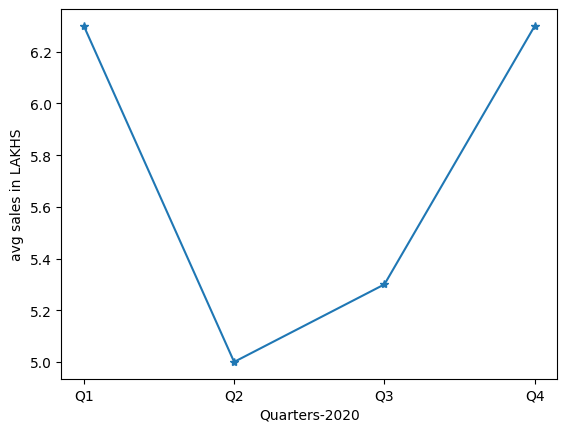

In [ ]:
avg_sales=[6.3,5.0,5.3,6.3]
labels=["Q1","Q2","Q3","Q4"]
plt.plot(labels,avg_sales, marker="*")
plt.ylabel("avg sales in LAKHS")
plt.xlabel("Quarters-2020")

**#OBSERVATION:**

SALES IN Q2,Q3 WERE VERY LOW AS COMPARED TP OTHER 2 QUARTERS